Data

In [30]:
import pandas as pd
df  = pd.read_csv("D:\\00Research\\00Fog\\008Arman\\mcr-rt\\dataset-mcr-rt3.csv")
dataset = df.values
#print('Total rows:', df.shape[0]) #550892
X = dataset[:, 6] # rt column
print(X)
Y = dataset[:, 5] # mcr column
print(Y)

[31.46461187214612 32.50226244343892 29.324384787472034 ...
 14.446096654275092 12.966666666666663 13.909090909090908]
[31.964562569213733 31.964562569213733 31.964562569213733 ...
 12.875968992248062 12.875968992248062 12.875968992248062]


Scatter

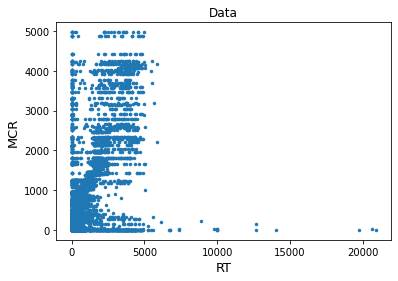

In [31]:
import matplotlib.pyplot as plt
plt.scatter(x=X, y=Y, marker=".", linewidth=0.5)
plt.title('Data')
plt.ylabel('MCR', fontsize=13)
plt.xlabel('RT', fontsize=13)
plt.show()

Reshape

In [32]:
from sklearn.model_selection import train_test_split
X = X.reshape(-1, 1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

Linear Regression + Predict + Plot

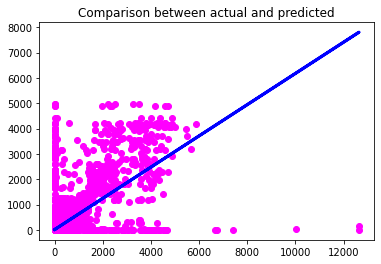

In [33]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, Y_train)

# prediction
y_predict = reg.predict(X_test)

plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, y_predict, color="blue", linewidth=3)  
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
#plt.legend('Prediction')
plt.show()

In [34]:
import numpy
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

print("Score is: ",numpy.round(reg.score(X_test, Y_test),4))
print("Accuracy is: ",numpy.round(mean_absolute_error(Y_test[:],y_predict[:])/numpy.mean(X_test),4))

Score is:  0.5173
Accuracy is:  0.5954


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

pipeline0 = Pipeline(steps=[('Polynomial', PolynomialFeatures(degree=3, include_bias=True)),('StandardScalar',StandardScaler()),('Reg', linear_model.ARDRegression(compute_score=True, n_iter=100000000))]).fit(X_train, Y_train)
print()

In [36]:
#Prediction
pipeline0_predict = pipeline0.predict(X_test)

print("Score is: ", numpy.round(pipeline0.score(X_test,Y_test),4))
print("Accuracy is: ",numpy.round(mean_absolute_error(Y_test,pipeline0_predict)/numpy.mean(X_test),4))


Score is:  0.5865
Accuracy is:  0.3644


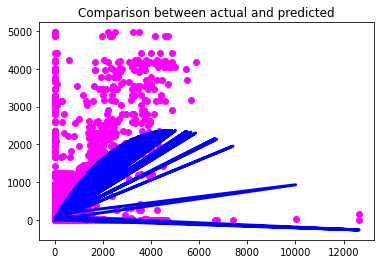

In [38]:
plt.scatter(x=X_test, y=Y_test, color="magenta")
plt.plot(X_test, pipeline0_predict, color="blue", linewidth=3)
plt.title('Comparison between actual and predicted')
plt.ylabel('', fontsize=18)
plt.xlabel('', fontsize=18)
plt.show()